# ANÁLISIS EXPLORATORIO DE LAS CAUSAS DE MUERTE EN SICILIA DURANTE EL PERIODO 2009-2017.

## Import packages and dataset.

In [1]:
#importación de librerías y dataset (fuente: https://dati.regione.sicilia.it/)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geojson

path='.\Data\cause_morte.csv'
dataframe= pd.read_csv(path)

#Una muestra de la composición del dataframe
dataframe.head()

,PERIODO,TERRITORIO,PATOLOGIA,MASCHI,FEMMINE
0,2009-2017,81001,Malattie infettive e parassitarie,4,6
1,2009-2017,81001,Tubercolosi,1,1
2,2009-2017,81001,Epatite virale,1,0
3,2009-2017,81001,Tumore,560,435
4,2009-2017,81001,Tumori maligni,545,426


## Exploring dataframe

In [2]:
#Detalle de la composición del dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PERIODO     17085 non-null  object
 1   TERRITORIO  17085 non-null  int64 
 2   PATOLOGIA   17085 non-null  object
 3   MASCHI      17085 non-null  int64 
 4   FEMMINE     17085 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 667.5+ KB


### Parcial

+ hay 17085 entradas.
+ no hay datos nulos

In [3]:
#Cuenta y Detalle de valores únicos
print('\033[1m Períodos: \n\033[0m', dataframe['PERIODO'].value_counts(),'\n')
print('\033[1m Territorio: \n\033[0m', dataframe['TERRITORIO'].value_counts(),'\n')
print('\033[1m Patologías: \n\033[0m', dataframe['PATOLOGIA'].value_counts(),'\n')

 Períodos: 
 2009-2017    17085
Name: PERIODO, dtype: int64 

 Territorio: 
 87015    63
82053    63
89017    62
88009    62
83048    61
         ..
82069    24
83071    24
83087    23
83018    23
83031    19
Name: TERRITORIO, Length: 390, dtype: int64 

 Patologías: 
 Malattie cerebrovascolari                                    390
Tumore                                                       390
Tumori maligni                                               390
Altre malattie del cuore                                     390
Malattie ischemiche del cuore                                390
                                                            ... 
Dipendenza da droghe, tossicomania                            27
Complicazioni della gravidanza, del parto e del puerperio     19
Infezione meningococcica                                       8
Sindrome della morte improvvisa nell'infanzia                  6
AIDS (malattia da HIV)                                         4
Name: PATOLOGIA

### Segundo Parcial

+ hay registros del período '2009-2017' (sin especificar el año)
+ los registros corresponden a las 390 comunas de Sicilia
+ el total de muertes se adjudica a 65 causas diversas (se incluyen enfermedades, accidentes, agresiones, entre otras)
+ Cada entrada informa de la "cantidad de hombres y mujeres que murieron por una patología en particular en una comuna de Sicilia durante el período 2009-2017"

 Muertes Femeninas  433167
 Muertes Masculinas  452979
 Muertes totales  886146
 Diferencia  19812  ( 2.24  %) 


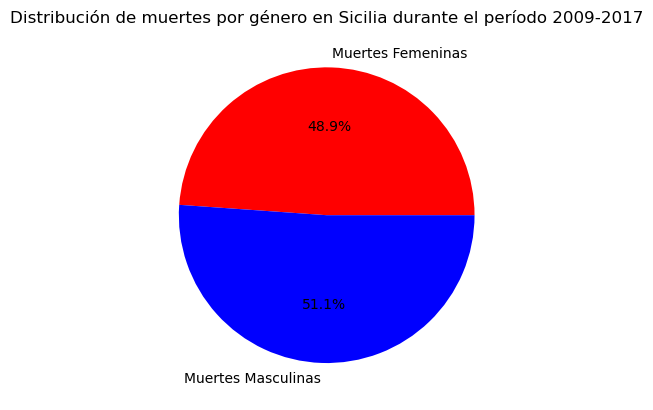

In [4]:
muertes_femeninas= dataframe['FEMMINE'].sum()
muertes_masculinas= dataframe['MASCHI'].sum()
total_de_muertes= muertes_femeninas + muertes_masculinas
diferencia_masc_fem= muertes_masculinas - muertes_femeninas
porcentaje_diferencia_masc_fem= round((diferencia_masc_fem*100/total_de_muertes),2)



print('\033[1m Muertes Femeninas \033[0m', muertes_femeninas)
print('\033[1m Muertes Masculinas \033[0m', muertes_masculinas)
print('\033[1m Muertes totales \033[0m', total_de_muertes)
print('\033[1m Diferencia \033[0m', diferencia_masc_fem,' (',porcentaje_diferencia_masc_fem,'\033[1m %) \033[0m')
plt.pie([muertes_femeninas, muertes_masculinas],labels=['Muertes Femeninas','Muertes Masculinas'], autopct='%.1f%%', colors=['r','b'])
plt.title('Distribución de muertes por género en Sicilia durante el período 2009-2017')
plt.show()


### Tercer Parcial

+ En principio no hay diferencia significativa entre hombres y mujeres. En este punto se abren algunos interrogantes en relación al género:
    + a. ¿cómo se da la distribución de muertes por género a lo largo del territorio?
    + b. ¿Hay alguna correlación significativa entre las patologías y el género?

### LÍNEA DE INVESTIGACIÓN: a. ¿cómo se da la distribución de muertes por género a lo largo del territorio?

 DIFERENCIA MASCULINA: 
      TERRITORIO  MASCHI  FEMMINE  DIFERENZA  DIFERENZA PERCENTUALE (%)
263       85007    6054     5095        959                       8.60
385       89017   10762     9860        902                       4.37
11        81012    4420     3651        769                       9.53
368       88012    4879     4227        652                       7.16
10        81011    8147     7525        622                       3.97
234       84021    3527     3021        506                       7.73
331       87033    4184     3718        466                       5.90
29        82006    4541     4090        451                       5.23
304       87006    2803     2405        398                       7.64
246       84033    2068     1671        397                      10.62
327       87029    3061     2664        397                       6.93
339       87041    1697     1307        390                      12.98
254       84041    3737     3354        383         

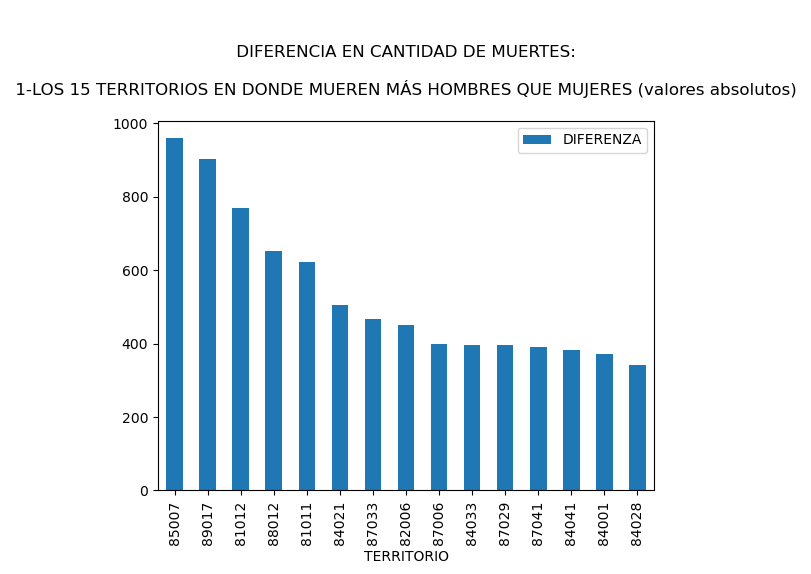

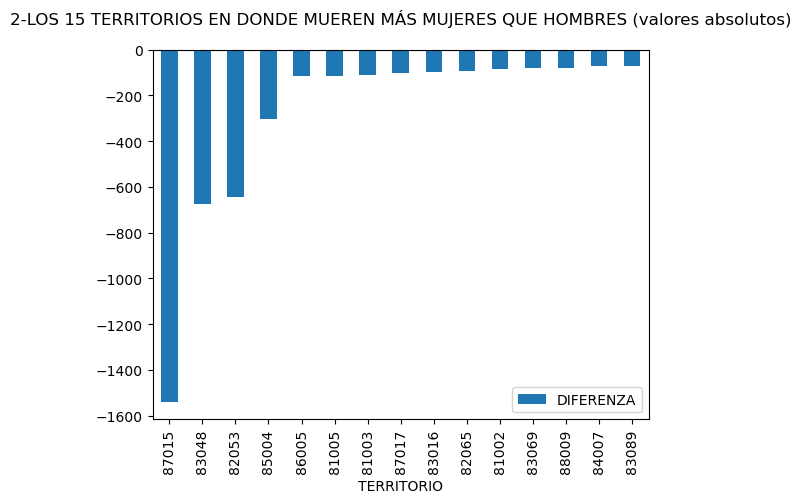

In [5]:
#Se crea la columna 'DIFERENZA' que indica la diferencia de muertes por género en cada fila

dataframe['DIFERENZA']= dataframe['MASCHI']-dataframe['FEMMINE']

#Se construye el dataframe3 para agrupar la información por territorio (se sacrifica el detalle de las patologías y se elimina la columna 'PERIODO')

agg_functions = {'MASCHI': 'sum', 'FEMMINE': 'sum', 'DIFERENZA': 'sum'}
dataframe3= dataframe.groupby(dataframe['TERRITORIO'], as_index=False).aggregate(agg_functions).reindex(columns=dataframe.columns).drop(columns=['PATOLOGIA', 'PERIODO'])

#Se crea la columna 'DIFERENZA PERCENTUALE (%)' que indica el impacto de la diferencia de muertes por género en cada fila

dataframe3['DIFERENZA PERCENTUALE (%)']=round(abs(dataframe3['DIFERENZA'])*100/(dataframe3['MASCHI']+dataframe3['FEMMINE']),2)


#Se ordena el dataframe de manera descente y luego ascendente tomando como referencia la columna 'DIFERENZA', de forma tal que en las gráficas se puede visualizar y contrastar los territorios
#en donde el valor absoluto de la diferencia es mayor en cada género.

maschi=dataframe3.sort_values('DIFERENZA', ascending= False)
femmine=dataframe3.sort_values('DIFERENZA', ascending= True)
print('\033[1m DIFERENCIA MASCULINA: \n\033[0m', maschi.head(15),'\n')
print('\033[1m DIFERENCIA FEMENINA: \n\033[0m', femmine.head(15))

#gráficas de barras

maschi.head(15).plot(x='TERRITORIO', y='DIFERENZA', kind='bar')
plt.title('\n\n DIFERENCIA EN CANTIDAD DE MUERTES: \n\n 1-LOS 15 TERRITORIOS EN DONDE MUEREN MÁS HOMBRES QUE MUJERES (valores absolutos) \n')
femmine.head(15).plot(x='TERRITORIO', y='DIFERENZA', kind='bar')
plt.title('2-LOS 15 TERRITORIOS EN DONDE MUEREN MÁS MUJERES QUE HOMBRES (valores absolutos)\n')
plt.show()

In [6]:
#Se ordena el dataframe3 de manera descendente tomando como referencia la columna 'DIFERENZA PERCENTUALE' 

print(dataframe3.sort_values('DIFERENZA PERCENTUALE (%)', ascending=False))

#Interesan de la siguiente tabla el promedio (mean) la desviación estandar (std) y la mediana (50%) 
#a los fines de comparar donde se ubica la 'DIFERENZA PERCENTUAL' más alta y la que corresponde a la mayor diferencia (masc y femm)
#con el resto de los datos

dataframe3.describe()

     TERRITORIO  MASCHI  FEMMINE  DIFERENZA  DIFERENZA PERCENTUALE (%)
176       83071      20       42        -22                      35.48
123       83018      59       30         29                      32.58
174       83069     109      190        -81                      27.09
233       84020     502      309        193                      23.80
388       89020     326      217        109                      20.07
..          ...     ...      ...        ...                        ...
333       87035     385      386         -1                       0.13
325       87027     534      533          1                       0.09
5         81006    2849     2845          4                       0.07
343       87045     780      781         -1                       0.06
201       83096     545      545          0                       0.00

[390 rows x 5 columns]


,TERRITORIO,MASCHI,FEMMINE,DIFERENZA,DIFERENZA PERCENTUALE (%)
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,84148.764103,1161.484615,1110.684615,50.800000,5.590077
std,2251.793694,3509.552933,3554.782959,161.376425,4.722266
min,81001.000000,20.000000,30.000000,-1539.000000,0.000000
25%,82074.250000,252.250000,247.500000,-12.000000,2.265000
50%,83089.500000,482.500000,455.000000,23.000000,4.510000
75%,86013.750000,977.750000,891.250000,86.750000,7.297500
max,89021.000000,55531.000000,56175.000000,959.000000,35.480000


#### Datos considerados: 'DIFERENZA PERCENTUALE'

promedio (mean):**5.59%** 

desviación estandar (std): **4.72%**

mediana (50%): **4.51%**

dataframe3[176], DIF:  -22: **35.48%**  (M:    20 F:    42 TERR: 83071) 

dataframe3[123], DIF:   29: **32.58%**  (M:    59 F:    30 TERR: 83018)

dataframe3[263], DIF:  959: **8.60%**  (M:  6054 F:  5095 TERR: 85007)

dataframe3[313], DIF:-1539: **2.60%**  (M: 28821 F: 30360 TERR: 87015)

#### Totales:

Muertes Femeninas:  433167

Muertes Masculinas:  452979

Muertes totales:  886146

Diferencia:  19812  (**2.24%**) 

### Conclusiones de la primer línea de investigación: RELACIÓN GÉNERO TERRITORIO
     La 'Diferenza Percentuale' indica qué porcentaje del total de muertes de un territorio representan las muertes que distancian (en cantidad) un género del otro. En este sentido, si bien la mayor diferencia se da en dataframe[313] con 1539 muertes más de mujeres que de hombres, su incidencia es apenas de un 2.60% dada la cantidad eleveda de muertes en ese territorio (87015). 
     ALgo similar ocurre con los dataframe[176, 123], en estos casos la 'Diferenza Percentuale': 35.48% y 32.58% respectivamente, es elevada pero se debe a la baja cantidad de muertes totales, por lo que la sensibilidad de dicha métrica es mucho mayor ante cada muerte.
     Por último, el caso del dataframe[263], con una incidencia de un 8.60% se presenta como el punto más alto de una tendencia en la diferencia de muertes positivas (más muertes masculinas que femeninas) en al menos 15 territorios que superan sensiblemente la desviación estandar de la 'Diferenza Percentuale': 2.60% así como la diferencia porcentual del total de la muestra: 2.24%.
     
###### Queda pendiente realizar una gráfica Choropleth que permita visualizar las 390 comunas de Sicilia en el mapa e identificar con mayor precisión la distribución de las métricas señalada.

#Se importa el archivo 'limits_R_19_municipalities.geojson' para poder construir luego el mapa gráfico

with open('.\Data\limits_R_19_municipalities.geojson') as archivo_geojson:
    datos = geojson.load(archivo_geojson)
dataframe2 = pd.json_normalize(datos['features'])
dataframe2

###### Por último sería interesante contar con los datos poblacionales del período 2009-2017 para poder valorar con mayor precisión la incidencia de las muertes en el territorio en el que ocurren.

### LÍNEA DE INVESTIGACIÓN: b. ¿Hay alguna correlación significativa entre las patologías y el género?

In [10]:
#Se construye el dataframe4 para agrupar la información por patologia (se elimina la columna 'TERRITORIO' y 'PERIODO')

agg_functions = {'MASCHI': 'sum', 'FEMMINE': 'sum', 'DIFERENZA': 'sum'}
dataframe4= dataframe.groupby(dataframe['PATOLOGIA'], as_index=False).aggregate(agg_functions).reindex(columns=dataframe.columns).drop(columns=['TERRITORIO','PERIODO'])
dataframe4['PATOLOGÍA/MASCHI (%)']= round(dataframe4['MASCHI']*100/(dataframe4['MASCHI'].sum()),2)
dataframe4['PATOLOGÍA/FEMMINE (%)']= round(dataframe4['FEMMINE']*100/(dataframe4['FEMMINE'].sum()),2)
dataframe4['MORTE PER PATOLOGIA']= dataframe4['MASCHI'] + dataframe4['FEMMINE']
dataframe4['MORTE PER PATOLOGIA (%)']= round(dataframe4['MORTE PER PATOLOGIA']*100/(dataframe4['MORTE PER PATOLOGIA'].sum()),2)


print('\033[1m PATOLOGÍAS MASCULINA: \n\033[0m', dataframe4.sort_values('MASCHI', ascending= False).drop(columns=['DIFERENZA','FEMMINE', 'PATOLOGÍA/FEMMINE (%)']).head(15),'\n')
print('\033[1m PATOLOGÍAS FEMENINA: \n\033[0m', dataframe4.sort_values('FEMMINE', ascending= False).drop(columns=['DIFERENZA', 'MASCHI','PATOLOGÍA/MASCHI (%)']).head(15),'\n')


#Se muestran nuevamente los totales para poder hacer una primera apreciación

print('\033[1m Muertes Femeninas \033[0m', muertes_femeninas)
print('\033[1m Muertes Masculinas \033[0m', muertes_masculinas)
print('\033[1m Muertes totales \033[0m', total_de_muertes)
print('\033[1m Diferencia \033[0m', diferencia_masc_fem,' (',porcentaje_diferencia_masc_fem,'\033[1m %) \033[0m')
print(dataframe4.describe())
###########################################################
##-------SELECCIONA LA FILA QUE QUIERA IMPECCIONAR-------##
###########################################################
dataframe4.iloc[[58, 21]]

 PATOLOGÍAS MASCULINA: 
                                             PATOLOGIA  MASCHI  \
24                  Malattie del sistema circolatorio   81203   
45                                             Tumore   66537   
46                                     Tumori maligni   65183   
34                      Malattie ischemiche del cuore   23722   
21                          Malattie cerebrovascolari   23689   
58  Tumori maligni della laringe e della trachea/b...   18343   
28                  Malattie del sistema respiratorio   16800   
5                            Altre malattie del cuore   16310   
31     Malattie endocrine, nutrizionali e metaboliche   11474   
13                                    Diabete mellito   10548   
22     Malattie croniche delle basse vie respiratorie    9358   
29                   Malattie dell'apparato digerente    8369   
10       Cause esterne di traumatismo e avvelenamento    8318   
42  Sintomi, segni, risultati anomali e cause mal ...    6820   


,PATOLOGIA,MASCHI,FEMMINE,DIFERENZA,PATOLOGÍA/MASCHI (%),PATOLOGÍA/FEMMINE (%),MORTE PER PATOLOGIA,MORTE PER PATOLOGIA (%)
58,Tumori maligni della laringe e della trachea/b...,18343,4967,13376,4.05,1.15,23310,2.63
21,Malattie cerebrovascolari,23689,35189,-11500,5.23,8.12,58878,6.64


### Conclusiones de la segunda línea de investigación: RELACIÓN GÉNERO PATOLOGÍA
     Prácticamente el 50% de las muertes fueron registradas en tres categorías: 'Malattie del sistema circolatorio', 'Tumore', 'Tumori maligni'; siendo su distribución por género similar y su diferencia insignificante (M:17.93%/F:23.25%; M:14.69%/F:11.48%; M:14.39%/F:11.19%). Los datos registrados a continuación tienen una incidencia menor en el total de muertes y tampoco son, a simple vista, representativos de un género en particular.
     Se deja en la última fila de la celda anterior un código simple que permite visualizar cada entrada, por si se precisa ver el detalle. Simplemente separe con una ',' (coma) cada nº de fila que quiera visualizar
     
###### Queda pendiente realizar una gráfica Choropleth que permita visualizar las 390 comunas de Sicilia en el mapa e identificar con mayor precisión la distribución de las métricas señalada.

#Se importa el archivo 'limits_R_19_municipalities.geojson' para poder construir luego el mapa gráfico

with open('.\Data\limits_R_19_municipalities.geojson') as archivo_geojson
    datos = geojson.load(archivo_geojson)
dataframe2 = pd.json_normalize(datos['features'])
dataframe2

###### Por último sería interesante contar con los datos poblacionales del período 2009-2017 para poder valorar con mayor precisión la incidencia de las muertes en el territorio en el que ocurren.